In [42]:
# Don't change this cell; just run it. 

import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

### Crime Dataset: Descriptive Visualizations

In [3]:
crime=pd.read_csv("Crimes.csv")
crime.head(20)
crime.shape
#MULTIPLE LINEAR REGRESSION

(264732, 22)

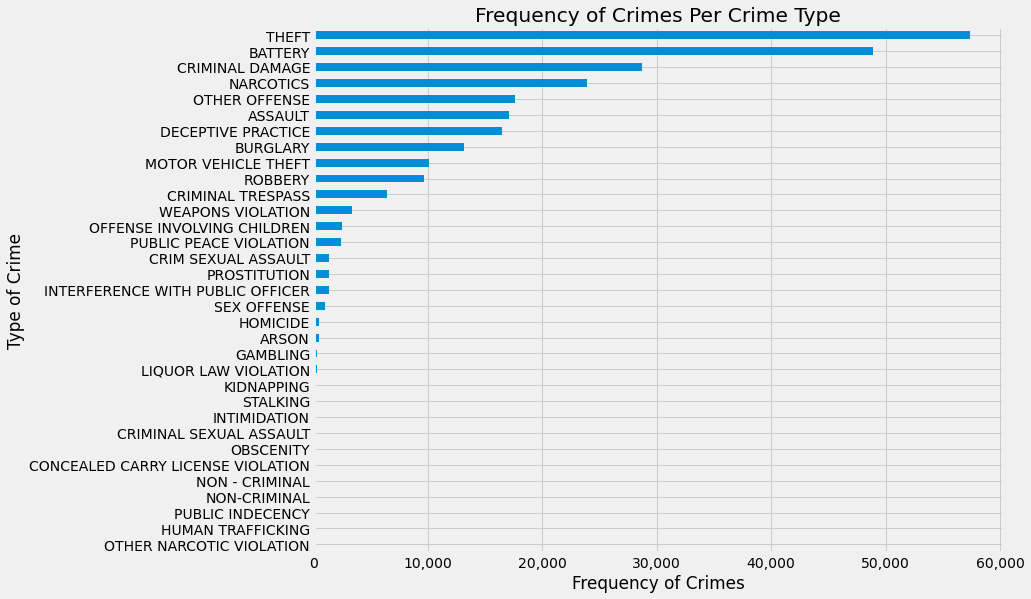

In [4]:
#Frequency of Crimes Per Crime Type
crimeType = crime['Primary Type'].value_counts(ascending=True)

fig=plt.figure(figsize=(11, 9))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crimeType.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

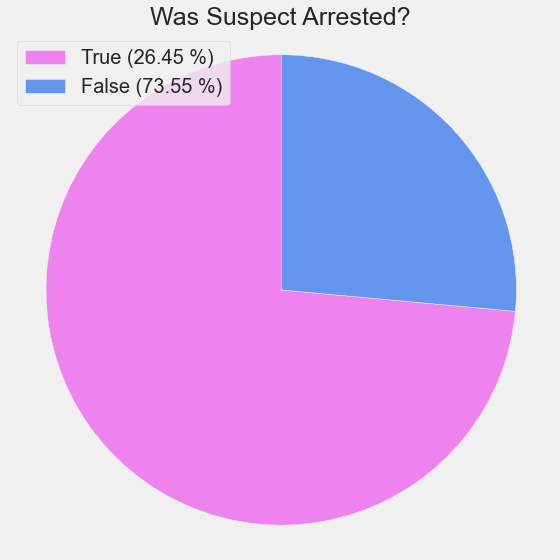

In [70]:
#Graph: Was an arrest made or not?
plt.figure(figsize=(8,8))
labels = [r'True (26.45 %)', r'False (73.55 %)']
sizes = [73.55, 26.45]
colors = ['violet', 'cornflowerblue']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best", fontsize = 20)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("Was Suspect Arrested?", fontsize = 25)
plt.tight_layout()
plt.show()


In [13]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### Community Economic Information Dataset

In [6]:
economics = pd.read_csv('economics.csv')

In [7]:
economics = economics.rename(columns={"Community Area Number": "Community Area"})

In [8]:
df = crime.merge(economics, on='Community Area', how = 'outer')

In [9]:
areas = pd.DataFrame(df['Community Area'].value_counts())
areas.reset_index(inplace=True)

In [10]:
areas.rename(columns={"index": "Areas", "Community Area": "Crime"}, inplace=True)
areas.sort_values(by="Areas", inplace=True)

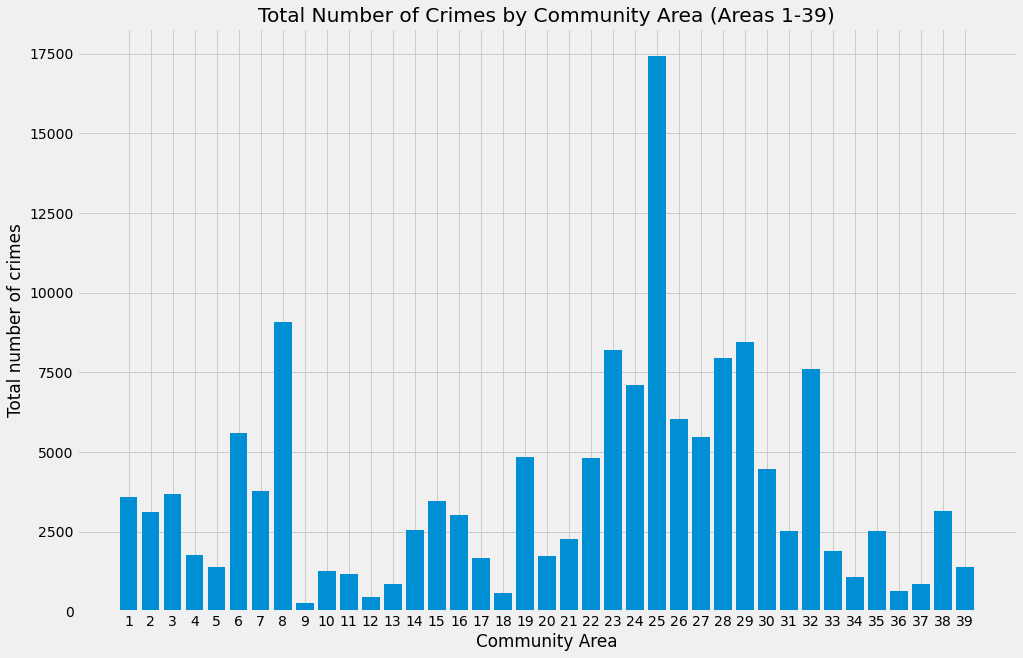

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

plt.bar(areas["Areas"].iloc[0:39], areas.Crime.iloc[0:39])
plt.xticks(range(1,40,1))
plt.yticks(range(0,20000, 2500))
plt.title('Total Number of Crimes by Community Area (Areas 1-39)', fontname="Sans Serif")
plt.xlabel("Community Area")
plt.ylabel("Total number of crimes", fontname="Sans Serif")
plt.show()

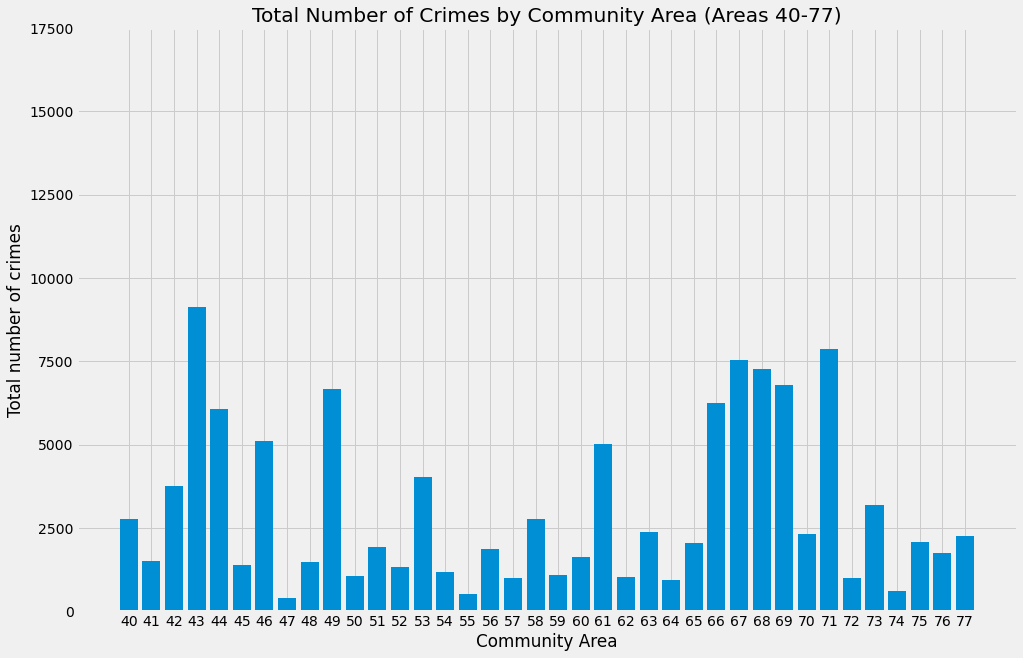

In [12]:
fig, ax = plt.subplots(figsize=(15,10))

plt.bar(areas["Areas"].iloc[39:77], areas.Crime.iloc[39:77])
plt.xticks(range(40,78,1))
plt.yticks(range(0,20000, 2500))
plt.title('Total Number of Crimes by Community Area (Areas 40-77)', fontname="Sans Serif")
plt.xlabel("Community Area")
plt.ylabel("Total number of crimes", fontname="Sans Serif")
plt.show()

### Sorting for Thefts

In [14]:
thefts = df.loc[df['Primary Type'] == 'THEFT']


In [15]:
sortedtheft = thefts['Community Area'].value_counts().rename_axis('community area').reset_index(name = 'counts').sort_values('community area')

In [16]:
sortedtheft.reset_index(inplace=True, drop=True)

In [17]:
totals = pd.read_csv('totals.csv')

In [18]:
totals['Total Population']=totals['Total Population'].str.replace(',','')

In [19]:
#Function to find the crime rate

for i in range(len(sortedtheft)):
    number = sortedtheft["community area"][i]
    count = sortedtheft["counts"][i]
    pop = int(totals.loc[totals["CCA"]==number,"Total Population"])
    sortedtheft['counts'][i] = 1000*count/pop

/var/folders/9x/p7wg9z3s2d328t8wjlx451yr0000gn/T/ipykernel_64261/3551614335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sortedtheft['counts'][i] = 1000*count/pop


### Merge datasets in new dataframe df

In [20]:
economics = economics.rename(columns={"Community Area": "community area"})

In [21]:
new_df = sortedtheft.merge(economics, on='community area', how = 'outer')

In [22]:
new_df = new_df.rename(columns={"counts": "Theft Rate"})

In [23]:
new_df = new_df.rename(columns={"community area": "Community Area"})

In [24]:
new_df.columns

Index(['Community Area', 'Theft Rate', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [25]:
new_df.drop('COMMUNITY AREA NAME', axis=1, inplace=True)

In [26]:
new_df.drop('Community Area', axis=1, inplace=True)

In [27]:
new_df = new_df.dropna()

### Multiple Linear Regression

In [28]:
X = new_df.drop('Theft Rate', axis=1)
Y = new_df["Theft Rate"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=101)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

ct = ColumnTransformer([('numeric', StandardScaler(), X.columns)])

In [31]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
predictions = model.predict(X_test)

In [35]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  116.27141930319561
mean_absolute_error :  7.721402558957555


In [36]:
pd.DataFrame(zip(X.columns, model.coef_))

,0,1
0,PERCENT OF HOUSING CROWDED,-5.445834
1,PERCENT HOUSEHOLDS BELOW POVERTY,-1.947245
2,PERCENT AGED 16+ UNEMPLOYED,4.444897
3,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,-5.533439
4,PERCENT AGED UNDER 18 OR OVER 64,-9.810351
5,PER CAPITA INCOME,10.335528
6,HARDSHIP INDEX,20.872034


In [72]:
#Find the intercept
model.intercept_

21.138812779927466

### Pairwise scatterplots for the response against each predictor variable

Text(0.5, 30.119999999999976, 'Percent Households Below Poverty')

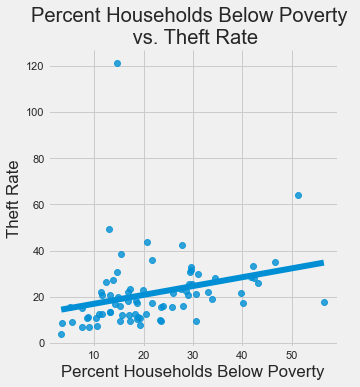

In [60]:
sns.lmplot(x="PERCENT HOUSEHOLDS BELOW POVERTY",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Percent Households Below Poverty \n vs. Theft Rate")
plt.xlabel("Percent Households Below Poverty")

Text(0.5, 30.119999999999976, 'Percent Aged 16+ Unemployed')

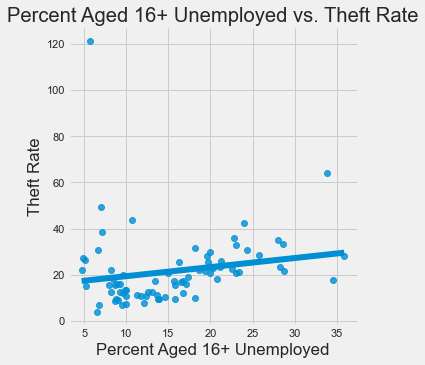

In [58]:
sns.lmplot(x="PERCENT AGED 16+ UNEMPLOYED",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Percent Aged 16+ Unemployed vs. Theft Rate")
plt.xlabel("Percent Aged 16+ Unemployed")


Text(0.5, 30.119999999999976, 'Percent Aged 25+ Without \n High School Diploma')

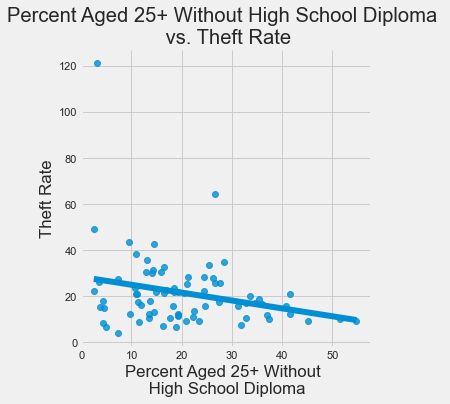

In [57]:
sns.lmplot(x="PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Percent Aged 25+ Without High School Diploma \n vs. Theft Rate")
plt.xlabel("Percent Aged 25+ Without \n High School Diploma")


Text(0.5, 30.119999999999976, 'Percent Aged Under 18 or Over 64')

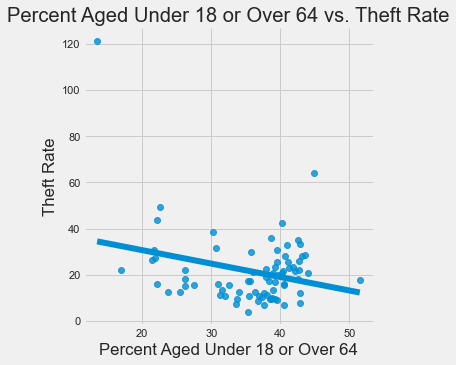

In [62]:
sns.lmplot(x="PERCENT AGED UNDER 18 OR OVER 64",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Percent Aged Under 18 or Over 64 vs. Theft Rate")
plt.xlabel("Percent Aged Under 18 or Over 64")



(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

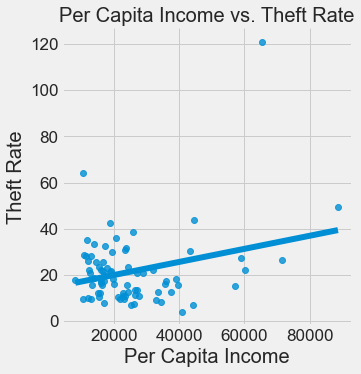

In [81]:
sns.lmplot(x="PER CAPITA INCOME ",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Per Capita Income vs. Theft Rate", fontsize = 20)
plt.xlabel("Per Capita Income", fontsize = 20)
plt.ylabel("Theft Rate", fontsize = 20)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

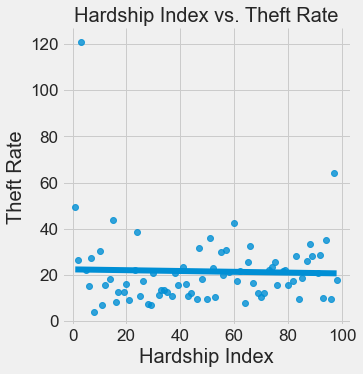

In [80]:
sns.lmplot(x="HARDSHIP INDEX",
                    y="Theft Rate", ci = None,
                    data=new_df)
plt.title("Hardship Index vs. Theft Rate", fontsize = 20)
plt.xlabel("Hardship Index", fontsize = 20)
plt.ylabel("Theft Rate", fontsize = 20)
plt.yticks(fontsize = 17)
plt.xticks(fontsize = 17)

In [71]:
new_df.corr()

,Theft Rate,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
Theft Rate,1.000000,-0.248879,0.280262,0.188288,-0.256134,-0.271419,0.275428,-0.031962
PERCENT OF HOUSING CROWDED,-0.248879,1.000000,0.319336,0.165160,0.875953,0.224593,-0.541711,0.649574
PERCENT HOUSEHOLDS BELOW POVERTY,0.280262,0.319336,1.000000,0.800046,0.424231,0.435537,-0.566851,0.803267
PERCENT AGED 16+ UNEMPLOYED,0.188288,0.165160,0.800046,1.000000,0.355474,0.676112,-0.656469,0.792294
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,-0.256134,0.875953,0.424231,0.355474,1.000000,0.408858,-0.709771,0.802538
PERCENT AGED UNDER 18 OR OVER 64,-0.271419,0.224593,0.435537,0.676112,0.408858,1.000000,-0.754763,0.690844
PER CAPITA INCOME,0.275428,-0.541711,-0.566851,-0.656469,-0.709771,-0.754763,1.000000,-0.849167
HARDSHIP INDEX,-0.031962,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000
